In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# defining X :
col = df.columns[0:-1]
X = df[col]

# model 
modelKM = KMeans(n_clusters= 3)

# fit and predict
y_kmeans = modelKM.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
# assigning the results in a new column
df['cluster'] = y_kmeans
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [24]:
# finding the centers
centers = modelKM.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

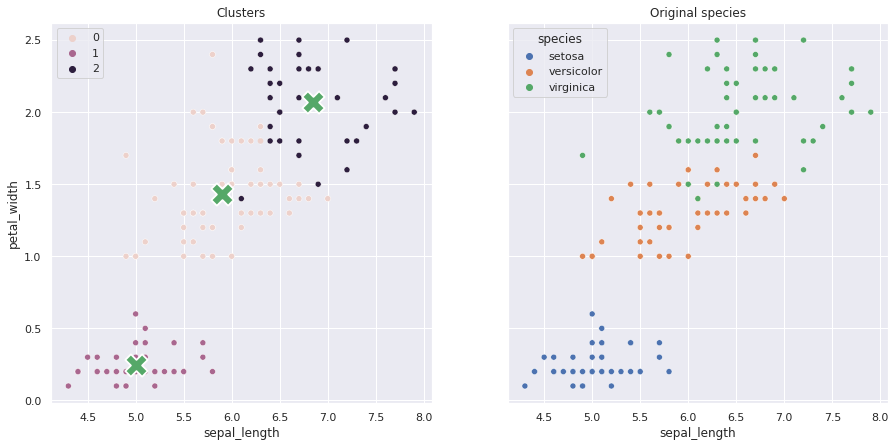

In [38]:
sns.set_theme()
fig, ax = plt.subplots(1,2, sharey=True,  figsize=(15,7))
ax[0].set_title('Clusters')
sns.scatterplot(ax = ax[0], data = df, x= 'sepal_length', y ='petal_width', hue = 'cluster')
sns.scatterplot(ax = ax[0], x = centers[:,0], y =centers[:,3], color = 'g', s = 500, marker='X')
ax[1].set_title('Original species')
sns.scatterplot(ax = ax[1], data = df, x= 'sepal_length', y ='petal_width', hue = 'species')
plt.show()

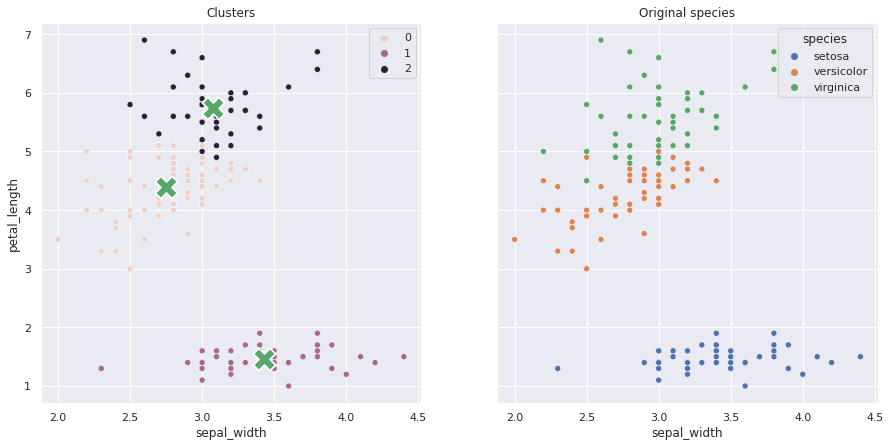

In [37]:
# avec d'autres colonnes
sns.set_theme()
fig, ax = plt.subplots(1,2, sharey=True,  figsize=(15,7))
ax[0].set_title('Clusters')
sns.scatterplot(ax = ax[0], data = df, x= 'sepal_width', y ='petal_length', hue = 'cluster')
sns.scatterplot(ax = ax[0], x = centers[:,1], y =centers[:,2], color = 'g', s = 500, marker='X')
ax[1].set_title('Original species')
sns.scatterplot(ax = ax[1], data = df, x= 'sepal_width', y ='petal_length', hue = 'species')
plt.show()

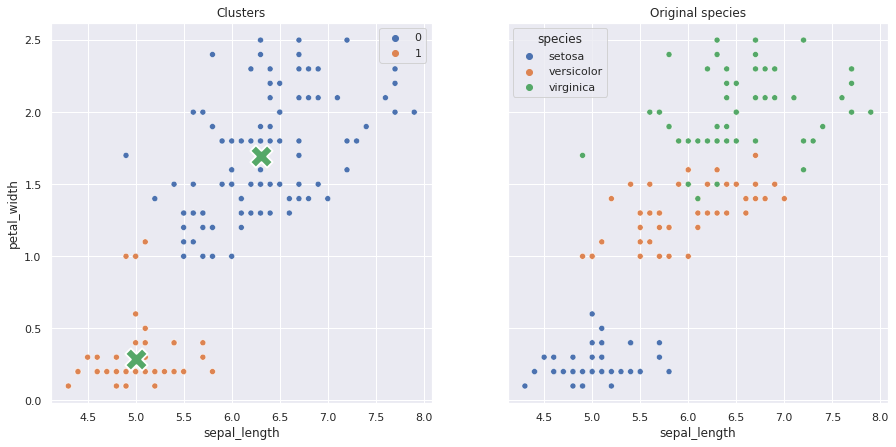

In [42]:
# 2 clusters model
modelKM2 = KMeans(n_clusters= 2)
# fit and predict
y_kmeans2 = modelKM2.fit_predict(X)

# centers
centers2 = modelKM2.cluster_centers_

# assigning the results in a new column
df['cluster-2'] = y_kmeans2

# plot
sns.set_theme()
fig, ax = plt.subplots(1,2, sharey=True,  figsize=(15,7))
ax[0].set_title('Clusters')
sns.scatterplot(ax = ax[0], data = df, x= 'sepal_length', y ='petal_width', hue = 'cluster-2')
sns.scatterplot(ax = ax[0], x = centers2[:,0], y =centers2[:,3], color = 'g', s = 500, marker='X')
ax[1].set_title('Original species')
sns.scatterplot(ax = ax[1], data = df, x= 'sepal_length', y ='petal_width', hue = 'species')
plt.show()

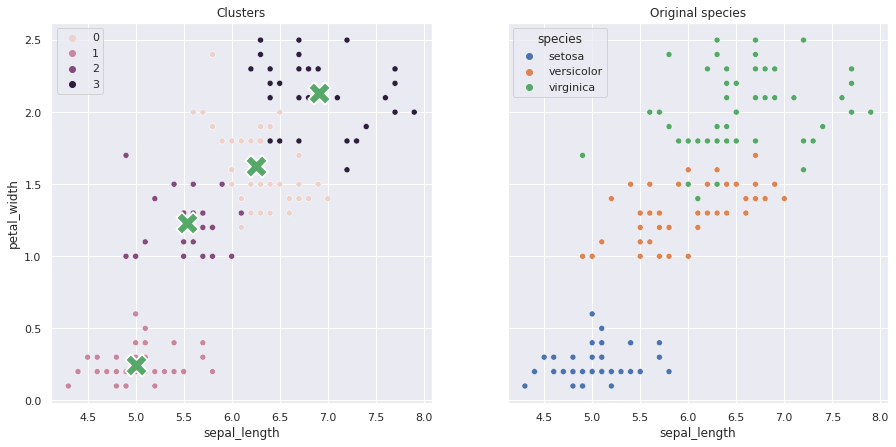

In [44]:
# 4 clusters
modelKM4 = KMeans(n_clusters= 4)
# fit and predict
y_kmeans4 = modelKM4.fit_predict(X)

# centers
centers4 = modelKM4.cluster_centers_

# assigning the results in a new column
df['cluster-4'] = y_kmeans4

# plot
sns.set_theme()
fig, ax = plt.subplots(1,2, sharey=True,  figsize=(15,7))
ax[0].set_title('Clusters')
sns.scatterplot(ax = ax[0], data = df, x= 'sepal_length', y ='petal_width', hue = 'cluster-4')
sns.scatterplot(ax = ax[0], x = centers4[:,0], y =centers4[:,3], color = 'g', s = 500, marker='X')
ax[1].set_title('Original species')
sns.scatterplot(ax = ax[1], data = df, x= 'sepal_length', y ='petal_width', hue = 'species')
plt.show()

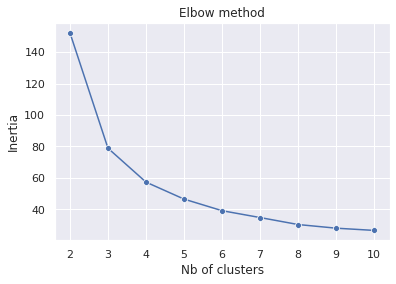

In [49]:
# evaluate the model with Elbow method :

# create a list with the intertia value for each k value
error = []
for k in range(2, 11):
  model = KMeans(n_clusters= k).fit(X)
  error.append(model.inertia_)

# plot the result
sns.lineplot(x= range(2,11), y = error, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Nb of clusters')
plt.ylabel('Inertia')
plt.show()

The number of clusters that seems ultimate is :3

In [48]:
# evaluate the model with silhouette method :
for k in range(2,11) :
  model = KMeans(n_clusters= k).fit(X)
  print(f'Silhouette score for {k} clusters : {silhouette_score(X, model.labels_)}')

Silhouette score for 2 clusters : 0.6810461692117465
Silhouette score for 3 clusters : 0.5528190123564102
Silhouette score for 4 clusters : 0.4974551890173758
Silhouette score for 5 clusters : 0.48874888709310654
Silhouette score for 6 clusters : 0.36784649847122536
Silhouette score for 7 clusters : 0.354396447858866
Silhouette score for 8 clusters : 0.3597454923845774
Silhouette score for 9 clusters : 0.32401158085625753
Silhouette score for 10 clusters : 0.2971738937276728


With the silhouette method, the optimal number of clusters is 2

Visually, I see 2 clusters.